# 背景

### 关于用户留存有这样一个观点，如果将用户流失率降低5%，公司利润将提升25%-85%。如今高居不下的获客成本让电信运营商遭遇“天花板”，甚至陷入获客难的窘境。随着市场饱和度上升，电信运营商亟待解决增加用户黏性，延长用户生命周期的问题。因此，电信用户流失分析与预测至关重要。 数据集来自kesci中的“电信运营商客户数据集”

# 提出问题

### 找出电信客户特征与其流失率之间的关系；建立模型预测客户流失度；提出改善客户流失度的建议与方案

# 载入相关库

In [68]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

#other 
import datetime
import warnings
warnings.filterwarnings('ignore')

# 载入数据集

### 计时器函数

In [73]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### 可见数据集共用21个字段：
customerID  客户ID  
gender 性别  
SeniorCitizen 老年用户    
Partner 该客户是否有伙伴  
Dependents 该客户是否有家属  
Tenure 客户使用公司产品的总时间  
PhoneService 客户是否有电话服务  
MultipleLines 客户是否有多条线路  
InternetService 客户网络服务供应商  
OnlineSecurity  客户是否有网络安全服务 有；无；没有购买网络服务  
Online Backup 客户是否有网络备份服务 有；无；没有购买网络服务  
DeviceProtection 客户是否有设备保修服务 有；无；没有购买网络服务  
TechSupport 客户是否有技术支持服务 有；无；没有购买网络服务  
StreamingTV 客户是否有直播电视服务 有；无；没有购买网络服务  
StreamingMovies  客户是否有直播电影服务  有；无；没有购买网络服务  
Contract 客户合约 月租；一年；两年  
PaperlessBilling 客户是否有纸质账单   
PaymentMethod 支付方式  
MonthlyCharges 每月收费  
TotalCharges 总收费额  
Churn  客户是否流失



# 数据清洗

In [6]:
df.isnull().any() #找空值

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### 发现数据集没有空值，但其实往下做到类型转换时会由于空值的存在报错，这是为什么呢

## 回excel里找到空值，我查阅资料发现 isnull() 无法找出空值字符串

In [7]:
print(df[df['TotalCharges'].isnull().values==True][['tenure','TotalCharges']])

Empty DataFrame
Columns: [tenure, TotalCharges]
Index: []


### 可以推测tenure=0的客户是刚刚入网的，但刚入网即使解约也需支付本月租金，我们可以将总收费缺失值设定为月租费用，将tenure设为1。 用replace函数将空字符串替换为月租费

In [8]:
#将总消费额填充为月消费额
df.loc[:,'TotalCharges'].replace(to_replace=' ',value=df.loc[:,'MonthlyCharges'],inplace=True)
#查看是否替换成功
print(df[df['tenure']==0][['tenure','MonthlyCharges','TotalCharges']])

      tenure  MonthlyCharges TotalCharges
488        0           52.55        52.55
753        0           20.25        20.25
936        0           80.85        80.85
1082       0           25.75        25.75
1340       0           56.05        56.05
3331       0           19.85        19.85
3826       0           25.35        25.35
4380       0           20.00           20
5218       0           19.70         19.7
6670       0           73.35        73.35
6754       0           61.90         61.9


### 大坑注意⚠️ 虽然根据上面的isnull().any() 发现并没有缺失值，但该方法只针对 值为null 的空值，而TotalCharges虽然有空值但实际为空字符串‘ ’ ，因此isnull( ) 函数认为无空值！！！

In [9]:
df.iloc[488,18:21] #原本索引为488 的TotalCharges的空值已被修改

MonthlyCharges    52.55
TotalCharges      52.55
Churn                No
Name: 488, dtype: object

### 将tenure 0 设为1

In [10]:
df.loc[:,'tenure'].replace(to_replace=0,value=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
# 将字串转换为浮点数
df['TotalCharges'] = df['TotalCharges'].astype('float64')

# EDA

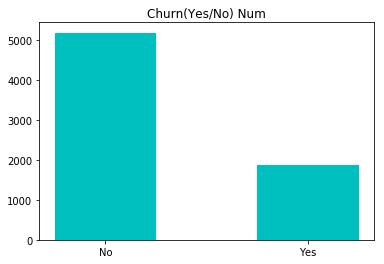

In [12]:
churnDf=df['Churn'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Churn']
plt.bar(x,y,width = 0.5,color = 'C')
plt.title('Churn(Yes/No) Num')
plt.show()

### 从上图可看出数据集不平衡，会影响模型训练

In [13]:
#？？？

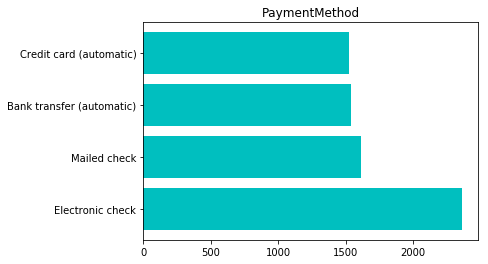

In [14]:
#支付方式分布图
PMdf=df['PaymentMethod'].value_counts().to_frame()
x=PMdf.index
y=PMdf['PaymentMethod']
plt.barh(x,y,color = 'C')# barh 将纵向图改为横向图
plt.title('PaymentMethod')
plt.show()

# 用户属性分析

### 找出gender、SeniorCitizen、Partner、Dependents、tenure 对用户流失率的影响

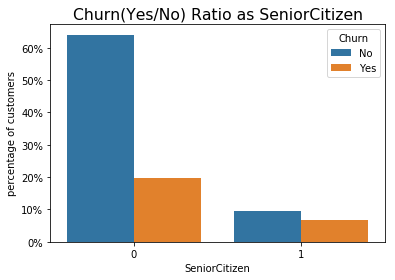

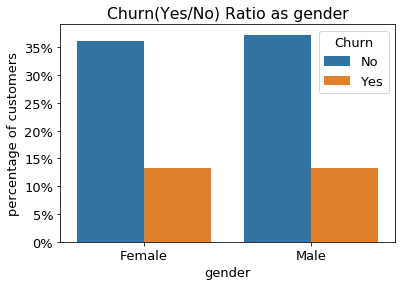

In [15]:
def barplot_percentages(feature,orient='v',axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = (df.groupby(feature)["Churn"].value_counts()/len(df)).to_frame()
    g.rename(columns={"Churn":axis_name},inplace=True)
    g.reset_index(inplace=True)

    #print(g)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
        plt.rcParams.update({'font.size': 13})
        #plt.legend(fontsize=10)
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
        plt.legend(fontsize=10)
    plt.title('Churn(Yes/No) Ratio as {0}'.format(feature))
    plt.show()
barplot_percentages("SeniorCitizen")
barplot_percentages("gender")

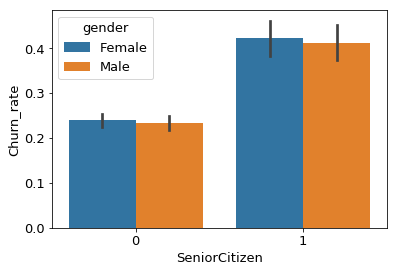

In [16]:
df['Churn_rate'] = df['Churn'].replace("No", 0).replace("Yes", 1)
sns.barplot(x='SeniorCitizen',y='Churn_rate',data=df,hue='gender')

### 由以上分析可见客户流失率和性别相关度较小，与是否为老年人相关度较大，老年客户流失率比非老年用户流失率高

### 看看家属和伴侣属性对流失率的影响

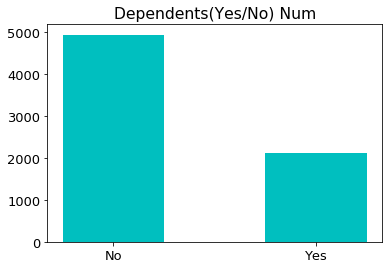

In [17]:
churnDf=df['Dependents'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Dependents']
plt.bar(x,y,width = 0.5,color = 'C')
plt.title('Dependents(Yes/No) Num')
plt.show()

### 看来有家属的客户比较少

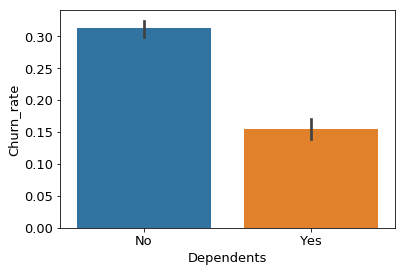

In [18]:
sns.barplot(x='Dependents',y='Churn_rate',data=df)

### 有家属的客户，流失率更低，猜测可能是因为家人一起用该公司的服务，不愿意换？

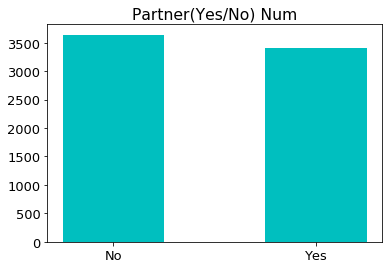

In [19]:
churnDf=df['Partner'].value_counts().to_frame()
x=churnDf.index
y=churnDf['Partner']
plt.bar(x,y,width = 0.5,color = 'C')
plt.title('Partner(Yes/No) Num')
plt.show()

### 有无伴侣的客户比率差距不大

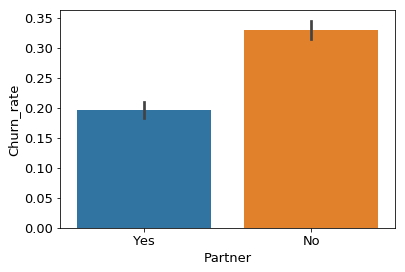

In [20]:
sns.barplot(x='Partner',y='Churn_rate',data=df)

### 同理，有伴侣的客户流失率更低，为什么呢？

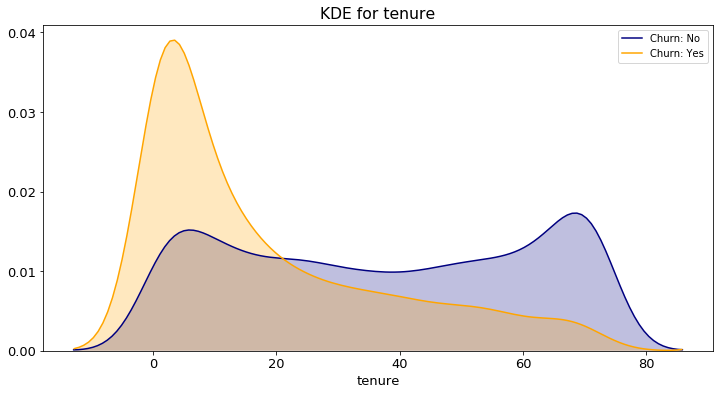

In [21]:
# Kernel density estimaton核密度估计
def kdeplot(feature,xlabel):
    plt.figure(figsize=(12, 6))
    plt.title("KDE for {0}".format(feature))
    ax0 = sns.kdeplot(df[df['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No', shade='True')
    ax1 = sns.kdeplot(df[df['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes',shade='True')
    plt.xlabel(xlabel)
    #设置字体大小
    plt.rcParams.update({'font.size': 20})
    plt.legend(fontsize=10)
kdeplot('tenure','tenure')
plt.show()

### tenure时间越长，流失率越低，tenure 小于20的客户流失率较高

# 服务属性分析

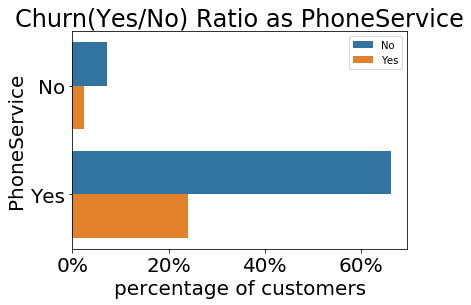

In [22]:
#PhoneService；MultipleLines
barplot_percentages('PhoneService',orient='h')

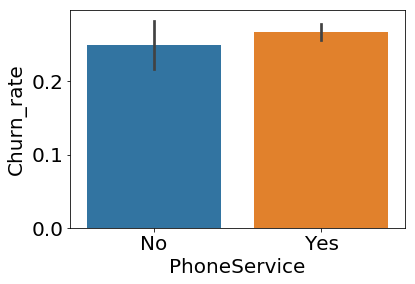

In [23]:
sns.barplot(x='PhoneService',y='Churn_rate',data=df)

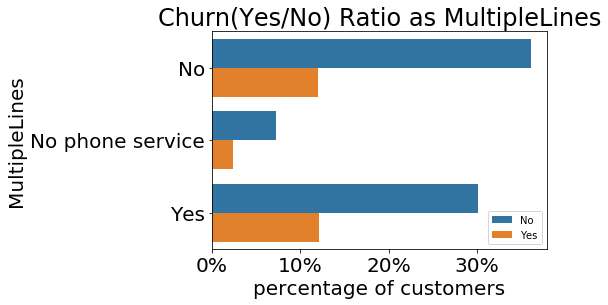

In [24]:
barplot_percentages('MultipleLines',orient='h')

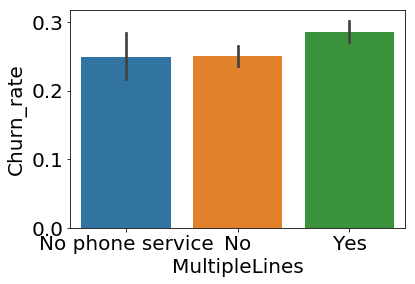

In [25]:
sns.barplot(x='MultipleLines',y='Churn_rate',data=df)

### 从上面4张图可以看出电话服务整体对用户流失影响较小

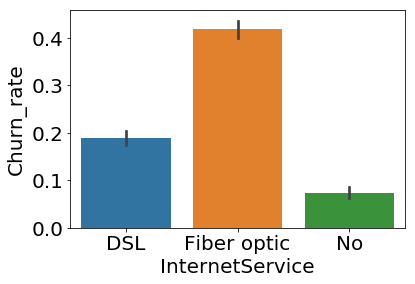

In [26]:
#InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport
#StreamingTV    
#StreamingMovies  
sns.barplot(x='InternetService',y='Churn_rate',data=df)

### 在网络服务中，装了光纤的用户流失率反而更高，DSL传统接线方式流失率第二，无网络服务反而流失率最低，为什么呢？

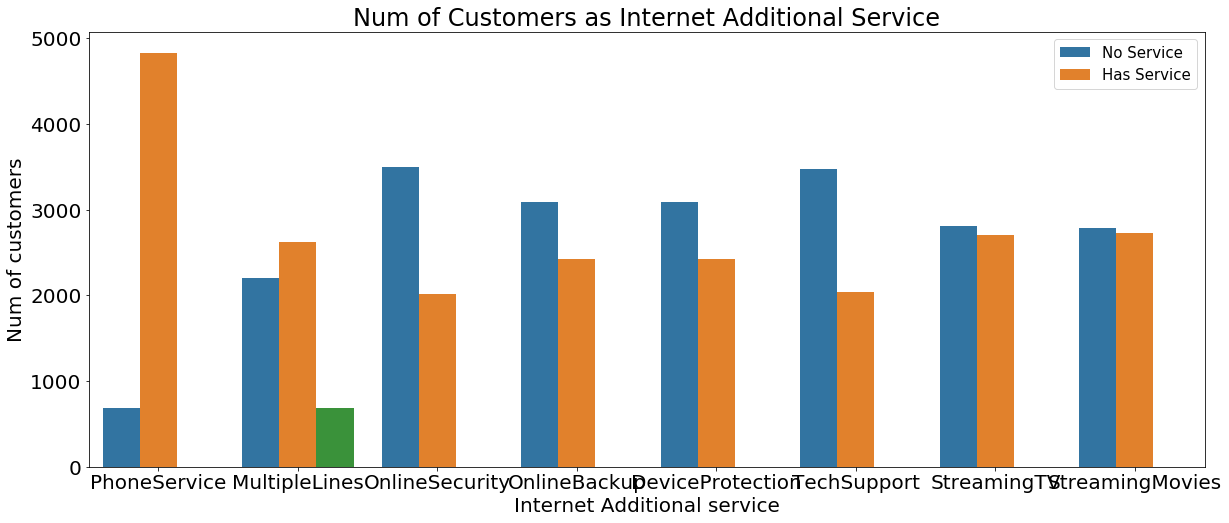

In [27]:
cols = ["PhoneService","MultipleLines","OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(df[df["InternetService"] != "No"][cols])
df1.rename(columns={'value': 'Has service'},inplace=True)
plt.figure(figsize=(20, 8))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Internet Additional service', ylabel='Num of customers')
plt.rcParams.update({'font.size':20})
plt.legend( labels = ['No Service', 'Has Service'],fontsize=15)
plt.title('Num of Customers as Internet Additional Service')
plt.show()

In [28]:
#。。。。还没完

# 合同属性分析

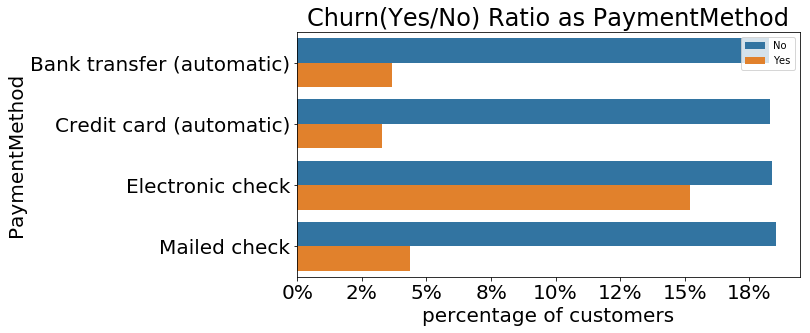

In [29]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod",orient='h')

### 支付方式 Electronic check 客户流失率非常高

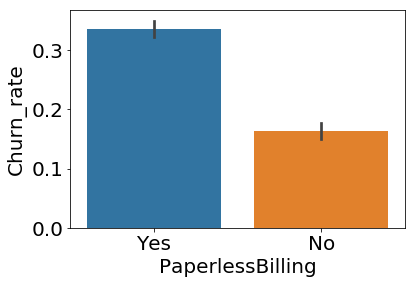

In [30]:
sns.barplot(x='PaperlessBilling',y='Churn_rate',data=df)

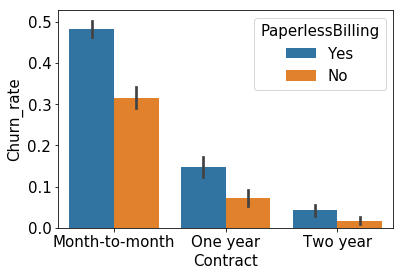

In [31]:
plt.rcParams.update({'font.size': 15})
sns.barplot(x='Contract',y='Churn_rate',hue='PaperlessBilling',data=df)

### 由上方两张图可见 无账单支付客户流失率较高，且合同流失率：1月期>1年期>2年期，因此在营销时应尽量发展客户签定长期合同

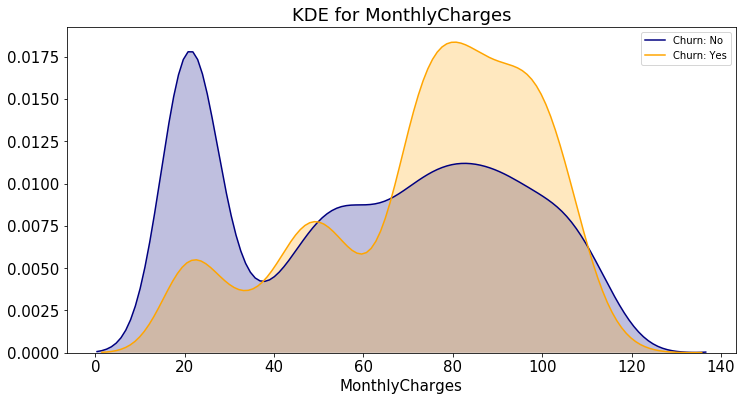

In [32]:
kdeplot('MonthlyCharges','MonthlyCharges')

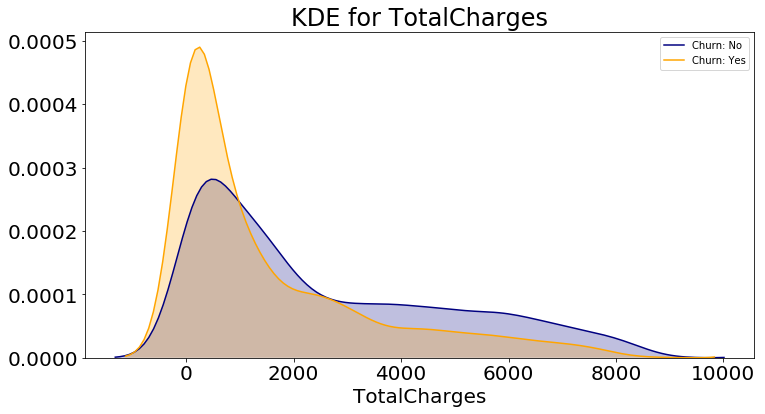

In [33]:
kdeplot('TotalCharges','TotalCharges')

### 月租费在70到100之间，客户流失率最高；总收费越高的，客户流失率越低，推测是老用户对公司服务产生粘性

# 特征工程

### drop 掉无用的客户ID，对连续变量（tenure、MonthlyCharges、TotalCharges做标准化，再对离散变量重新编码

In [34]:
df.drop('customerID',axis=1, inplace=True)

### 标准化连续数据，将输出结果的nparray转化为dataframe

In [35]:
from sklearn.preprocessing import StandardScaler
#标准化，返回值为标准化后的数据
df_continous = df.loc[:,['tenure','MonthlyCharges','TotalCharges']]
df_continous=StandardScaler().fit_transform(df_continous)
df_continous

array([[-1.27761364, -1.16032292, -0.99266722],
       [ 0.06626929, -0.25962894, -0.17219813],
       [-1.23688992, -0.36266036, -0.95812162],
       ...,
       [-0.87037639, -1.1686319 , -0.85298475],
       [-1.15544247,  0.32033821, -0.87056638],
       [ 1.3694285 ,  1.35896134,  2.01392524]])

In [36]:
df_continous = pd.DataFrame(df_continous,columns=['tenure','MonthlyCharges','TotalCharges'])

In [37]:
df_continous #检查一下

,tenure,MonthlyCharges,TotalCharges
0,-1.277614,-1.160323,-0.992667
1,0.066269,-0.259629,-0.172198
2,-1.236890,-0.362660,-0.958122
3,0.514230,-0.746535,-0.193706
4,-1.236890,0.197365,-0.938930
5,-0.992548,1.159546,-0.643836
6,-0.422415,0.808907,-0.145771
7,-0.911100,-1.163647,-0.872640
8,-0.178073,1.330711,0.338066
9,1.206534,-0.286218,0.533031


### one-hot 编码连续变量

In [38]:
mapping1 = {'Yes':1, 'No':0}
df['Churn'] = df['Churn'].map(mapping1)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_rate
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1
5,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,1
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,0,0
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,0,0
8,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,...,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,1
9,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,...,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,0,0


In [39]:
cateCols = [c for c in df.columns if df[c].dtype == 'object' or c == 'SeniorCitizen']
df_discrete = df[cateCols].copy()
df_Churn = df['Churn'].copy()
df_discrete.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic)
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check


In [40]:
pd.pandas.set_option('max_row',10) #控制输出output的格式 link：https://blog.csdn.net/weixin_43553694/article/details/92798367
df_discrete=pd.get_dummies(df_discrete) 
df_discrete.head(10)

,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
1,0,0,1,1,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,1
2,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
3,0,0,1,1,0,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,0,1,0,1,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
5,0,1,0,1,0,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
6,0,0,1,1,0,0,1,0,1,0,...,0,1,0,0,0,1,0,1,0,0
7,0,1,0,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1
8,0,1,0,0,1,1,0,0,1,0,...,1,1,0,0,0,1,0,0,1,0
9,0,0,1,1,0,0,1,0,1,1,...,0,0,1,0,1,0,1,0,0,0


### 合并discrete和continous data frame

In [41]:
df_result = pd.concat([df_continous,df_discrete,df_Churn], axis=1)

In [42]:
pd.pandas.set_option('max_columns',21)
df_result.head(10)

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,-1.277614,-1.160323,-0.992667,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,0
1,0.066269,-0.259629,-0.172198,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2,-1.236890,-0.362660,-0.958122,0,0,1,1,0,1,0,...,1,0,0,0,1,0,0,0,1,1
3,0.514230,-0.746535,-0.193706,0,0,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
4,-1.236890,0.197365,-0.938930,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
5,-0.992548,1.159546,-0.643836,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,1
6,-0.422415,0.808907,-0.145771,0,0,1,1,0,0,1,...,1,0,0,0,1,0,1,0,0,0
7,-0.911100,-1.163647,-0.872640,0,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
8,-0.178073,1.330711,0.338066,0,1,0,0,1,1,0,...,1,0,0,0,1,0,0,1,0,1
9,1.206534,-0.286218,0.533031,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,0,0,0


## 特征选取

### 相关系数法

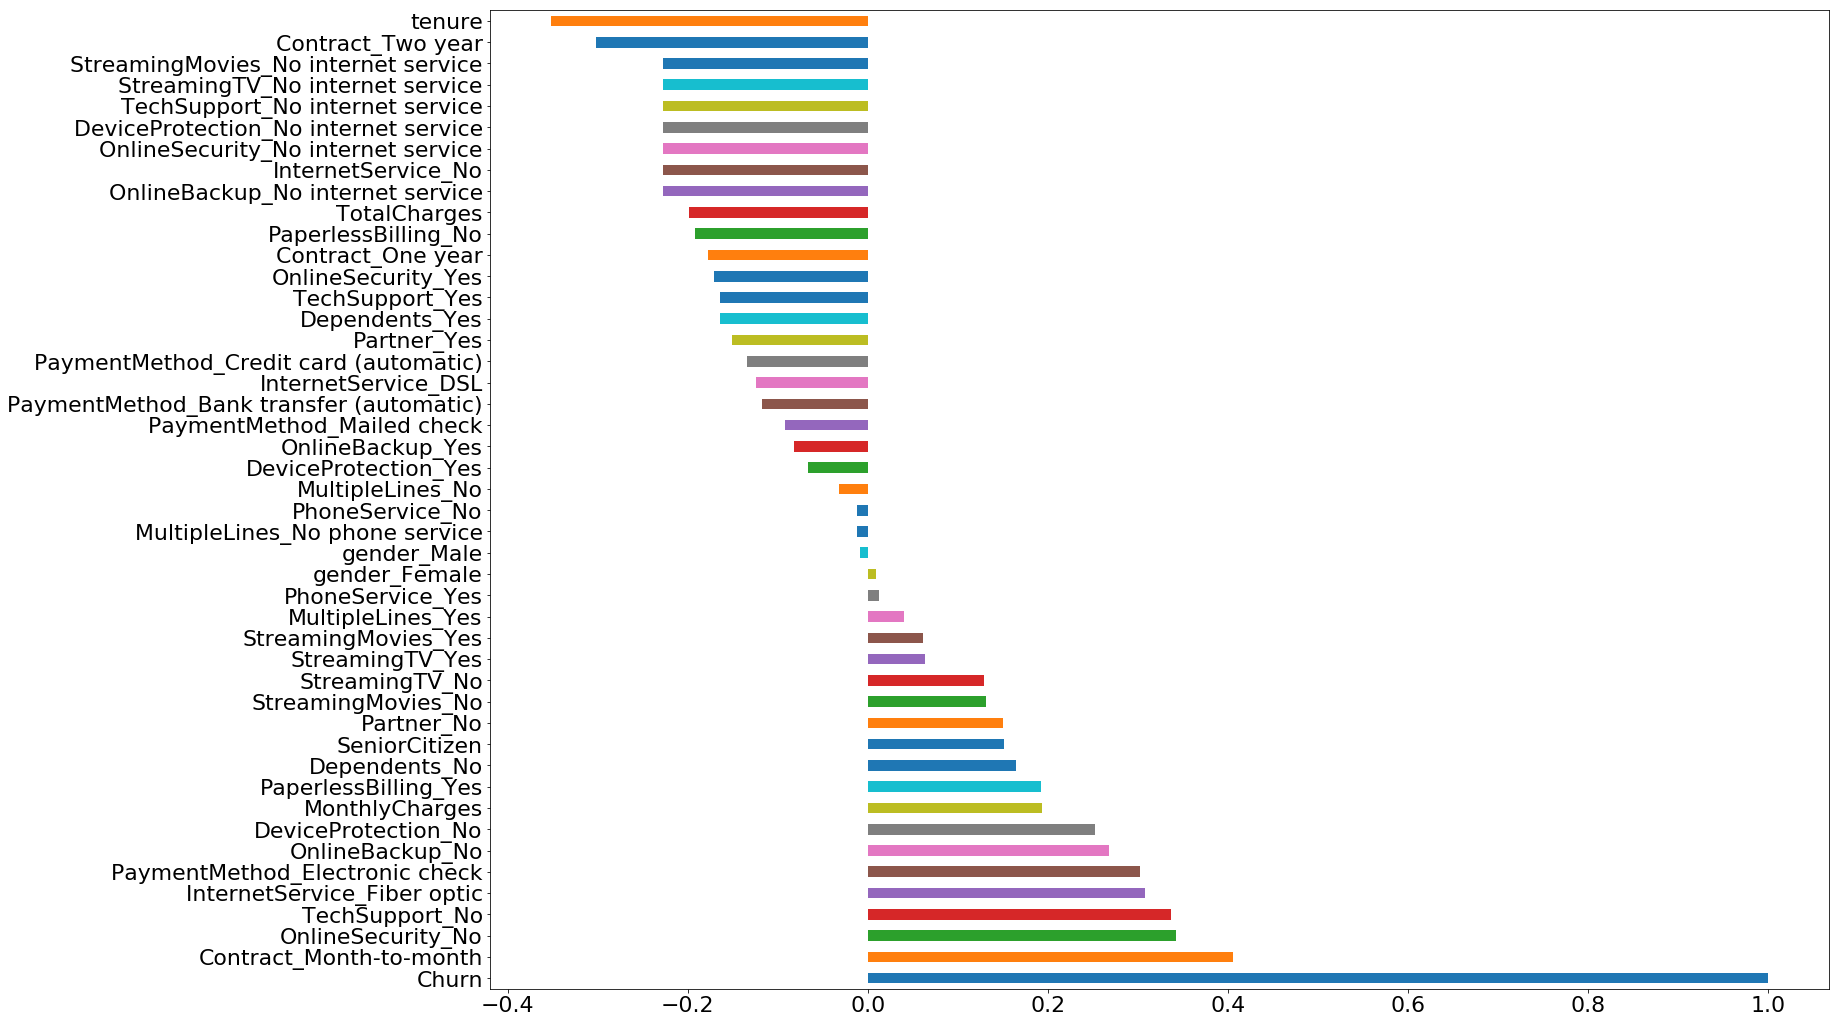

In [91]:
plt.figure(figsize=(24,18))
plt.rcParams.update({'font.size': 22})
df_result.corr()['Churn'].sort_values(ascending=False).plot(kind='barh')
plt.show()

In [92]:
# 特征选择
dropFea = ['gender','PhoneService',
           'OnlineSecurity_No internet service', 'OnlineBackup_No internet service',
           'DeviceProtection_No internet service', 'TechSupport_No internet service',
           'StreamingTV_No internet service', 'StreamingMovies_No internet service',
           #'OnlineSecurity_No', 'OnlineBackup_No',
           #'DeviceProtection_No','TechSupport_No',
           #'StreamingTV_No', 'StreamingMovies_No',
           ]
df_result.drop(dropFea, inplace=True, axis =1) 

KeyError: "labels ['gender' 'PhoneService'] not contained in axis"

# 构造模型

In [43]:
#最后一列是作为标识
target = df_result['Churn'].values
#列表：特征和1个标识
columns = df_result.columns.tolist()

In [105]:
# 列表：特征
columns.remove('Churn')
# 含有特征的DataFrame
features = df_result[columns].values


ValueError: list.remove(x): x not in list

In [108]:
# 30% 作为测试集，其余作为训练集
# random_state = 1表示重复试验随机得到的数据集始终不变
# stratify = target 表示按标识的类别，作为训练数据集、测试数据集内部的分配比例
from sklearn.model_selection import train_test_split
X_train, Y_test, y_train, y_test = train_test_split(features, target, test_size=0.30, stratify = target, random_state = 1)

ValueError: Found input variables with inconsistent numbers of samples: [4930, 2113]

In [101]:
'''from xgboost import XGBClassifier
model = XGBClassifier(max_depth=10,
            learning_rate=0.01,
            n_estimators=2000,
            silent=1,
            objective='binary:logistic',
            nthread=2,
            gamma=0,
            min_child_weight=1,
            max_delta_step=0,
            subsample=0.85,
            colsample_bytree=0.7,
            colsample_bylevel=1,
            reg_alpha=0,
            reg_lambda=1,
            scale_pos_weight=1,
            seed=1440,
            missing=None)

# 载入模型（模型命名为model)
model.fit(x_train,y_train)            # 训练模型（训练集）
y_pred = model.predict(x_test)        # 模型预测（测试集），y_pred为预测结果
'''

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='roc_auc', cv=10)
gsearch.fit(X_train,y_train)
print(gsearch.best_params_, gsearch.best_score_)


{'classify__max_depth': 6, 'classify__n_estimators': 40} 0.8482855666021305


In [102]:
x_train.shape
y_test.shape

(2113,)

In [103]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
print("Accuracy = {}".format(accuracy_score(y_test, y_pred)))

Accuracy = 0.7903454803596782


In [ ]:
!pip install --upgrade pip


    94% |██████████████████████████████▎ | 1.4MB 12kB/s eta 0:00:07